# LSTM model

Develop:
 - Univariate one-step LSTM model
 - Univariate multi-step LSTM model

This is a link to the parts of code that I used: <a href="https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/">machinelearningmastery.com</a>

#### Import libraries

In [1]:
#from libraries import *
%run libraries.py

Load previosly downloaded time series

In [2]:
df = load_data()

### Univariate one-step LSTM model

Divide data into multiple samples with 3 input / 1 output sequence for the one-step prediction.<br>
Define, compile and fit model with 50 LSTM units in the hidden layer and an output layer that predicts a single output value

In [3]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = df.close
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)


# walk-forward prediction for plot
history = list()
predictions = list()

for t in range(len(X)):
    x_input = X[t].reshape((1, n_steps, n_features))
    output = model.predict(x_input, verbose=0)
    yhat = output[0][0]
    predictions.append(yhat)
    history.append(y[t])

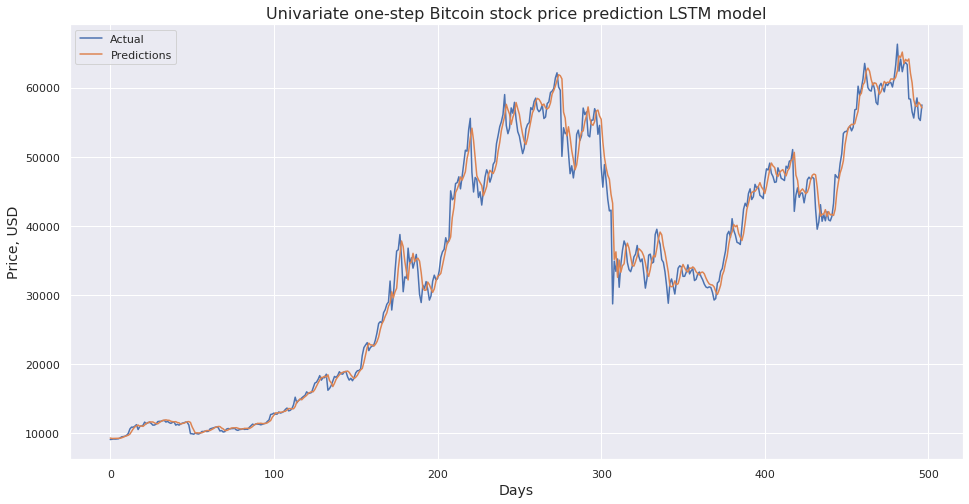

In [4]:
plot_ts([[history, 'Actual'], [predictions, 'Predictions']], 'Univariate one-step Bitcoin stock price prediction LSTM model', 'Days')

Plot part of predictions to have a better scale

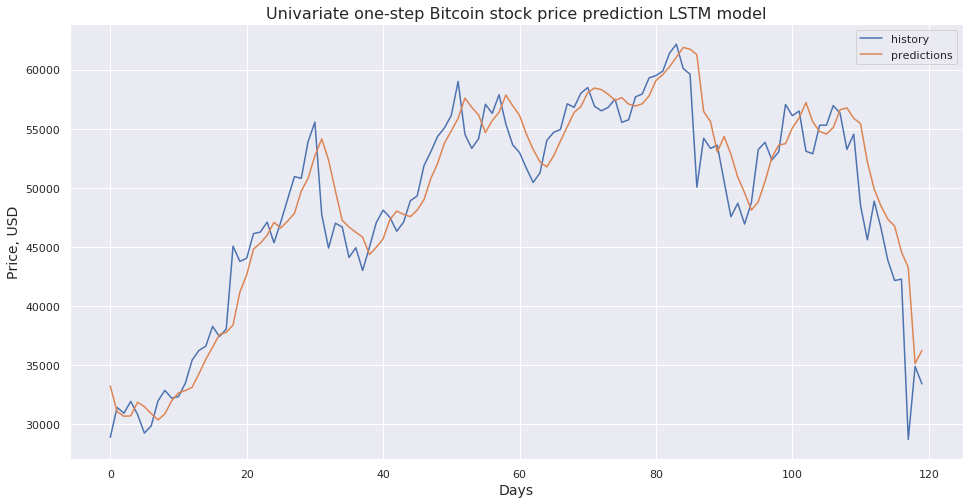

In [5]:
plot_ts([[history[190:310], 'history'], [predictions[190:310], 'predictions']], 'Univariate one-step Bitcoin stock price prediction LSTM model', 'Days')

### Univariate multi-step LSTM model

Divide data into multiple samples with 3 input / 2 output sequence for the multi-step prediction.<br>
Define, compile and fit model with 100 LSTM units in each of the 2 hidden layers and an output layer that predicts 2 output values 

In [6]:
# multi-step data preparation
 
# split a univariate sequence into samples
def multistep_split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

# define input sequence
ms_raw_seq = df.close
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X_ms, y_ms = multistep_split_sequence(ms_raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_ms = X_ms.reshape((X_ms.shape[0], X_ms.shape[1], n_features))
# define model
ms_model = Sequential()
ms_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
ms_model.add(LSTM(100, activation='relu'))
ms_model.add(Dense(n_steps_out))
ms_model.compile(optimizer='adam', loss='mse')
# fit model
ms_model.fit(X_ms, y_ms, epochs=50, verbose=0)

# walk-forward prediction for plot
ms_history = list()
ms_predictions = list()

for t in range(len(X) - n_steps_in):
    x_input = X_ms[t].reshape((1, n_steps_in, n_features))
    ms_output = ms_model.predict(x_input, verbose=0)
    yhat_ms = ms_output[0][1]
    ms_predictions.append(yhat_ms)
    ms_history.append(y_ms[t][1])

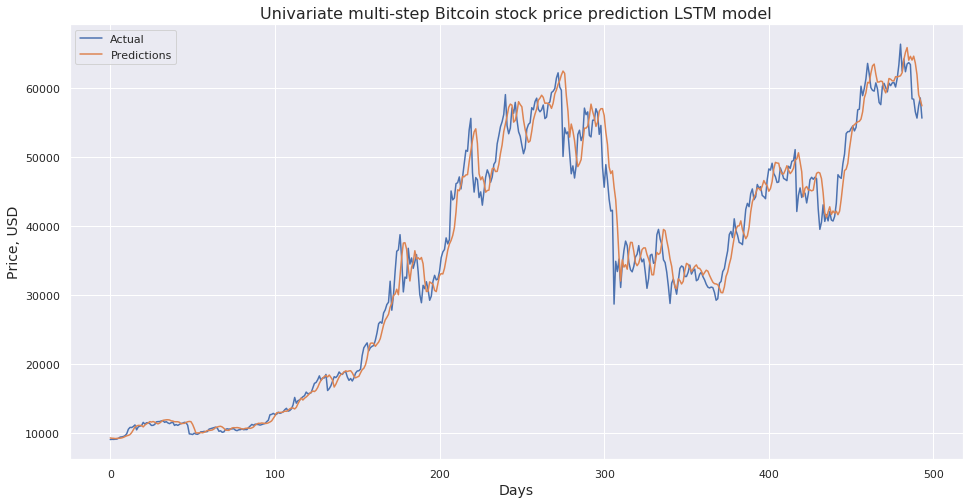

In [7]:
plot_ts([[ms_history, 'Actual'], [ms_predictions, 'Predictions']], 'Univariate multi-step Bitcoin stock price prediction LSTM model', 'Days')

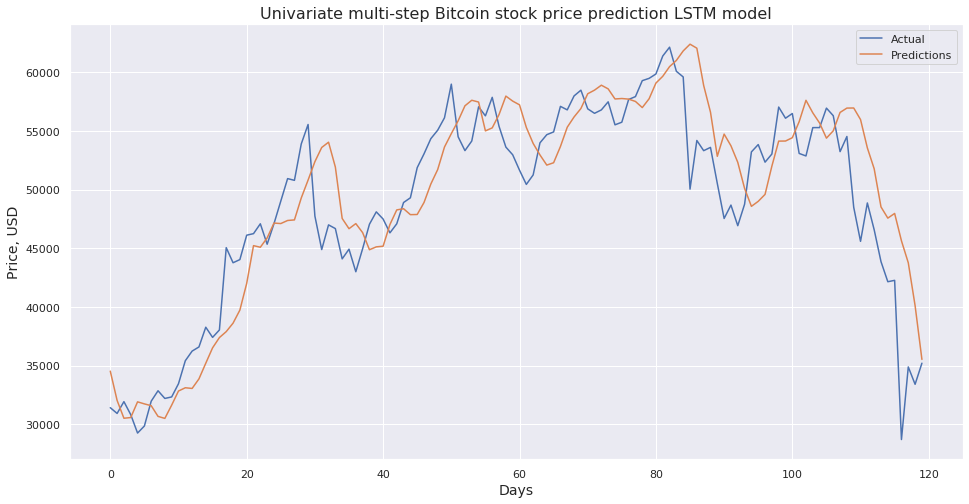

In [8]:
plot_ts([[ms_history[190:310], 'Actual'], [ms_predictions[190:310], 'Predictions']], 'Univariate multi-step Bitcoin stock price prediction LSTM model', 'Days')